<a href="https://colab.research.google.com/github/mdegnan200/MiniProject3/blob/main/Unit3_SecondMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Requirements as presented by Instructor**

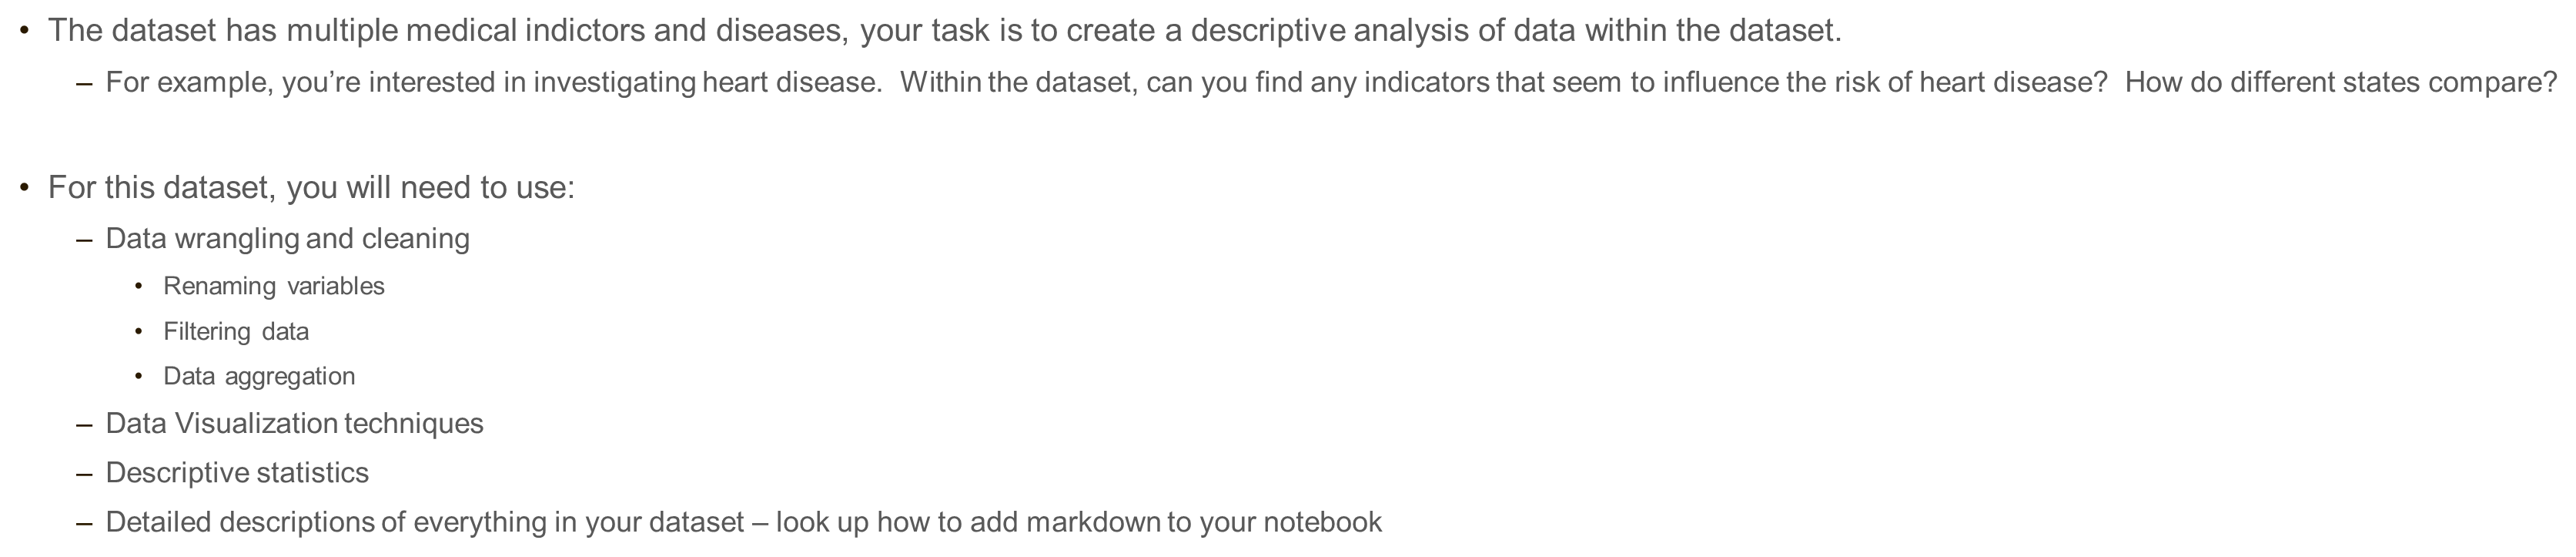

# **Requirements as interpreted by me**
1.  Inspect the dataset provided by insructor.
2.  Determine what I want to investigate within this data.
3.  Decided to hone in on patients who had a Medical Specialty of OB/Gyn.
4.  Wanted to view the impact of Race and Diabetes Medication on Length of Hospital Stay.  Here is what I found: 
*   African Americans on average stayed in the hospital longer.  All patients (df) and the Ob/Gyn cohort (df3).
*   An even greater driver of longer hospital stays is if the patient was taking Diabetes Medication.  Length of Stay was materially longer for patients (both cohorts df and df3) who were treating diabetes with medication.
*   Analysis of Types of patients in the cohorts:  Over 77% of the patients (df) were considered diabetic.  Over 65% of Ob/Gyn patients (df3) were diabetic.
*   Visiualizations are very telling.
*   **Recommendation to HealthCare Industry:  Closely manage patients with Diabetes as they go to the hospital more often and have longer stays.**











**Importing my dataset** and accessing via dataframe df. Let's see what the data looks like by viewing the first 5 rows.  

In [110]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Importing my Visualization libraries**

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

**Analyzing the info** regarding discrete data elements in dataframe df.  Can see that the longest hospital stay is 14 days.  Can see that the minimum stay is 1 day - so each encounter involves at least 1 day of a hospital sstay.  Every day in the hospital costs a lot of money for the patient and the insurance company.  Let's try to come up with ways to minimize the length of hospital stays.  

In [112]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

**Rename a few important columns:  Length of Stay and Specialty**

In [118]:
df.rename(columns={'time_in_hospital':'length of stay', 'medical_specialty':'specialty'},inplace=True)
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   length of stay            101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  specialty                 101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

**Need to skinny down the data** - Selecting only pertinent columns.  First I review the data dictionary.  I decide based on the description what data is essential for my analysis.  

In [115]:
df2 = df[['encounter_id','patient_nbr','race','gender','age','length of stay','specialty','diag_1','diag_2','diag_3','diabetesMed']]
df2.head(10)

,encounter_id,patient_nbr,race,gender,age,length of stay,specialty,diag_1,diag_2,diag_3,diabetesMed
0,2278392,8222157,Caucasian,Female,[0-10),1,Pediatrics-Endocrinology,250.83,?,?,No
1,149190,55629189,Caucasian,Female,[10-20),3,?,276,250.01,255,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),2,?,648,250,V27,Yes
3,500364,82442376,Caucasian,Male,[30-40),2,?,8,250.43,403,Yes
4,16680,42519267,Caucasian,Male,[40-50),1,?,197,157,250,Yes
5,35754,82637451,Caucasian,Male,[50-60),3,?,414,411,250,Yes
6,55842,84259809,Caucasian,Male,[60-70),4,?,414,411,V45,Yes
7,63768,114882984,Caucasian,Male,[70-80),5,?,428,492,250,Yes
8,12522,48330783,Caucasian,Female,[80-90),13,?,398,427,38,Yes
9,15738,63555939,Caucasian,Female,[90-100),12,InternalMedicine,434,198,486,Yes


**Understanding the 'Heavy Hitters'**.  I group by Medical Specialty to understand what specialties are being treated during these encounters.  I see that there are 671 encounters for Ob/Gyn.  Since my neice just had a baby last week and there were complications that caused her and the baby to stay in the hospital for 4 days (everyone is happy and healthy now :)), I decide to focus my analysis on those 671 encounters.

In [119]:
df2.groupby(['specialty']).count()

,encounter_id,patient_nbr,race,gender,age,length of stay,diag_1,diag_2,diag_3,diabetesMed
specialty,,,,,,,,,,
?,49949,49949,49949,49949,49949,49949,49949,49949,49949,49949
AllergyandImmunology,7,7,7,7,7,7,7,7,7,7
Anesthesiology,12,12,12,12,12,12,12,12,12,12
Anesthesiology-Pediatric,19,19,19,19,19,19,19,19,19,19
Cardiology,5352,5352,5352,5352,5352,5352,5352,5352,5352,5352
...,...,...,...,...,...,...,...,...,...,...
Surgery-PlasticwithinHeadandNeck,1,1,1,1,1,1,1,1,1,1
Surgery-Thoracic,109,109,109,109,109,109,109,109,109,109
Surgery-Vascular,533,533,533,533,533,533,533,533,533,533


In [144]:
df2.groupby(['diabetesMed']).count()

,encounter_id,patient_nbr,race,gender,age,length of stay,specialty,diag_1,diag_2,diag_3
diabetesMed,,,,,,,,,,
No,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403
Yes,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363


**Skinnying the dataset again** this time by selecting only certain rows;  df3 has only the OB/GYN encounters.  

In [120]:
df3 = df2[(df2['specialty'] == 'ObstetricsandGynecology')]
df3.head(5)

,encounter_id,patient_nbr,race,gender,age,length of stay,specialty,diag_1,diag_2,diag_3,diabetesMed
198,2638410,6225435,Caucasian,Female,[30-40),4,ObstetricsandGynecology,642,648,654,No
207,2677470,4943709,?,Female,[80-90),3,ObstetricsandGynecology,625,618,618,Yes
331,3320148,5075091,AfricanAmerican,Female,[30-40),8,ObstetricsandGynecology,642,648,648,Yes
367,3511230,4190778,Caucasian,Female,[20-30),1,ObstetricsandGynecology,648,250.03,278,Yes
372,3563736,3292920,Caucasian,Female,[20-30),3,ObstetricsandGynecology,648,250.01,664,Yes


**Inspecting the data**.  Now that I know what I want to focus on, let's really hone in on data and what it is telling us by 'slicing and dicing'.  

**Data Inspection:**  Just going to remind myself of the data and what it looks like - what kind of slicing and dicing do I want to do - Evaluate acverage time in hospital:  By race, diag_1, diag_2, diag_3 and diabetesMed.  I do not need to do analysis by gender or Medical specialty as gender is always female and Medical Speciality is always Ob/Gyn.  

In [121]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 198 to 101173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   encounter_id    671 non-null    int64 
 1   patient_nbr     671 non-null    int64 
 2   race            671 non-null    object
 3   gender          671 non-null    object
 4   age             671 non-null    object
 5   length of stay  671 non-null    int64 
 6   specialty       671 non-null    object
 7   diag_1          671 non-null    object
 8   diag_2          671 non-null    object
 9   diag_3          671 non-null    object
 10  diabetesMed     671 non-null    object
dtypes: int64(3), object(8)
memory usage: 62.9+ KB


**Confirmed that all are patients are women with a medical specialty of Ob/Gyn - data looks good!**

In [122]:
df3.groupby(['specialty']).count()

,encounter_id,patient_nbr,race,gender,age,length of stay,diag_1,diag_2,diag_3,diabetesMed
specialty,,,,,,,,,,
ObstetricsandGynecology,671,671,671,671,671,671,671,671,671,671


In [123]:
df3.groupby(['gender']).count()

,encounter_id,patient_nbr,race,age,length of stay,specialty,diag_1,diag_2,diag_3,diabetesMed
gender,,,,,,,,,,
Female,671,671,671,671,671,671,671,671,671,671


**Analyzing the data - Slicing and Dicing to understand which grouping has the longest average hospital stay.**  Found a nice aggregate function which allows me to view the count and the average(mean) on the same line.  Will perform this analysis for race, age, diag_1, diag_2, diag_3 and diabetesMed.

In [124]:
df3.groupby(['age']).agg(['count','mean'])

encounter_id                ... length of stay          
                count          mean  ...          count      mean
age                                  ...                         
[10-20)            14  1.044872e+08  ...             14  3.285714
[20-30)           192  1.111970e+08  ...            192  3.359375
[30-40)           190  1.116053e+08  ...            190  3.073684
[40-50)           107  1.058564e+08  ...            107  2.588785
[50-60)            64  1.139223e+08  ...             64  3.437500
[60-70)            43  1.234716e+08  ...             43  2.860465
[70-80)            45  1.156388e+08  ...             45  2.800000
[80-90)            14  9.239750e+07  ...             14  3.214286
[90-100)            2  9.228514e+07  ...              2  8.000000

[9 rows x 6 columns]

**Age group of 50-60 has the longest average hospital stay at 3.4 days.**  This is not a huge surprise.  This indicates that more care management is required for geriatic pregnancies.  

In [125]:
df3.groupby(['race']).agg(['count','mean'])

encounter_id                ... length of stay          
                       count          mean  ...          count      mean
race                                        ...                         
?                         22  1.165166e+08  ...             22  2.590909
AfricanAmerican          187  1.012771e+08  ...            187  3.401070
Asian                      5  1.087334e+08  ...              5  3.000000
Caucasian                418  1.114005e+08  ...            418  3.028708
Hispanic                  34  1.529335e+08  ...             34  2.735294
Other                      5  1.630921e+08  ...              5  3.000000

[6 rows x 6 columns]

**AfricanAmerican women had the longest average hospital stay at 3.4 days**.  This was a bit of a surprise to me.  The data indicates that Care Management should be increased for African American women during their pregnancies.  

In [126]:
df3.groupby(['diag_1']).agg(['count','mean'])


encounter_id                ... length of stay          
              count          mean  ...          count      mean
diag_1                             ...                         
158               1  8.597550e+06  ...              1  5.000000
180               2  5.946630e+07  ...              2  3.500000
182              30  9.321250e+07  ...             30  3.733333
183               5  6.474480e+07  ...              5  5.400000
184               1  1.794690e+08  ...              1  4.000000
...             ...           ...  ...            ...       ...
878               1  5.171197e+07  ...              1  4.000000
997               3  8.945046e+07  ...              3  3.666667
998               9  7.250287e+07  ...              9  3.777778
V26               1  1.486603e+08  ...              1  1.000000
V70               1  2.157651e+08  ...              1  1.000000

[73 rows x 6 columns]

Upon review of the data it appears that a few Diagnosis Codes had more than 10 patients with an average hospital stay of over 3.4 days:  642 (Hypertension complicating pregnancy), 182 (Malignant Neoplasm of uterus), 644 (Early or threatened labor) and 661 (Abnormality of forces of labor).  Patients with these diagnosis codes could have benefitted from better Care Management.  But this is a bit like looking back in the mirror.  You do not have the diagnosis until after the problem arises.  We need more information before the problem arises. 

In [127]:
df3.groupby(['diag_2']).agg(['count','mean'])

encounter_id              patient_nbr              length of stay     
              count         mean       count         mean          count mean
diag_2                                                                       
135               1   75721824.0           1    2089746.0              1  3.0
182               1   48113658.0           1     897075.0              1  7.0
189               1  179469024.0           1   44009064.0              1  4.0
196               2  117934824.0           2   48188484.0              2  5.0
197               1   74116680.0           1   27725211.0              1  6.0
...             ...          ...         ...          ...            ...  ...
V42               1   51497874.0           1    4787649.0              1  3.0
V44               1  260969010.0           1   79464051.0              1  4.0
V45               1   92096310.0           1   16964766.0              1  5.0
V72               1   24501378.0           1   25841187.0              1  2.0
V85               1  349622198.0           1  167209808.0              1  2.0

[107 rows x 6 columns]

Second Diagnosis code seemed to reveal a secondary diagnosis of diabetes (code of 250.02 - 250.09) as a possible driver of longer time in hospital.  

In [128]:
df3.groupby(['diag_3']).agg(['count','mean'])

encounter_id                ... length of stay          
              count          mean  ...          count      mean
diag_3                             ...                         
183               1  2.452854e+08  ...              1  3.000000
195               1  1.480035e+08  ...              1  5.000000
197               1  7.745171e+07  ...              1  7.000000
218              22  8.919199e+07  ...             22  2.772727
220               1  8.684094e+07  ...              1  1.000000
...             ...           ...  ...            ...       ...
V27              18  1.113718e+08  ...             18  2.666667
V42               1  6.168042e+07  ...              1  2.000000
V45               1  2.558444e+07  ...              1  2.000000
V58              13  2.023800e+08  ...             13  2.769231
V65               2  1.384305e+08  ...              2  2.500000

[121 rows x 6 columns]

A thrid diagnosis code of Hypertension (code of 642) seems to be related to a longer hospital stay.  

**Diabetes Relating to Length of Stay in Hospital?**  Now lets look at those patients who are on Daibetes Medicine (which means they have been previously diagnossed as diabetic).  We can clearly see that if the patient has diabetes there seems to be a correlation with length of stay in the hospital.  

In [129]:
df3.groupby(['diabetesMed']).agg(['count','mean'])

encounter_id                ... length of stay          
                   count          mean  ...          count      mean
diabetesMed                             ...                         
No                   231  1.039610e+08  ...            231  2.740260
Yes                  440  1.150261e+08  ...            440  3.293182

[2 rows x 6 columns]

Selecting only those patients who stayed in the hospital 4 or more days.  Maybe I will want to review these a little closer later when running my graphs.  

In [130]:
df4 = df3[(df2['length of stay'] >= 4)]
df4.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,encounter_id,patient_nbr,length of stay
count,1.840000e+02,1.840000e+02,184.000000
mean,9.261948e+07,2.926402e+07,5.173913
std,7.283036e+07,3.275569e+07,1.948006
min,2.638410e+06,1.001340e+05,4.000000
25%,4.246552e+07,3.963683e+06,4.000000
50%,7.368978e+07,1.742094e+07,4.000000
75%,1.131723e+08,5.244647e+07,5.000000
max,4.232202e+08,1.655921e+08,14.000000


**Reviewing By Race**
**Count Plot**
My first chart below looks at the full cohort (df) in which we can clearly see that about 25% of the patients are African American.  
The second chart (df3) looks at the Ob/Gyn patients only.  You can clearly see that more than 33% of the patients are African American.  This leads me to understand that on a relative basis African American women are being serviced at the facility more for their OB/Gyn needs than other specialties. 
The final chart looks at those patients who had a longer than average stay (4 days or longer) at the facility.  This is the most concerning piece of data.  African American women 

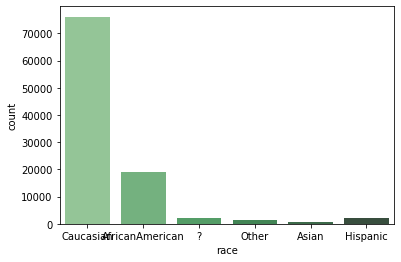

In [131]:
 sns.countplot(x="race", data=df, palette="Greens_d")

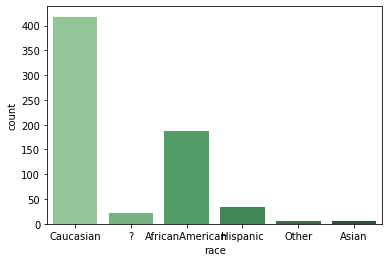

In [132]:
 sns.countplot(x="race", data=df3, palette="Greens_d")

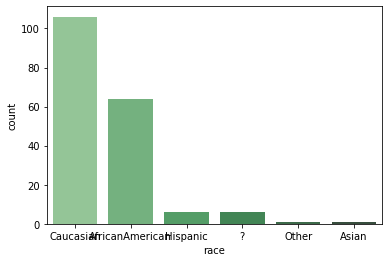

In [133]:
 sns.countplot(x="race", data=df4, palette="Greens_d")

**Reviewing By Race**
**Point Plot**
My first chart below looks at the full cohort (df) in which we can clearly see that about African Americans have the longest length of stay.  
The second chart (df3) looks at the Ob/Gyn patients only.  You can clearly see that African American women have the longest average length of stay.  

Text(0, 0.5, 'Length of Stay')

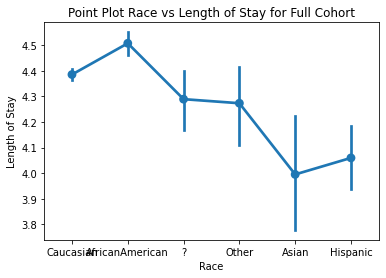

In [138]:
sns.pointplot(x="race", y="length of stay",data=df)
# Adding Title to the Plot
plt.title("Point Plot Race vs Length of Stay for Full Cohort")
  
# Setting the X and Y labels
plt.xlabel('Race')
plt.ylabel('Length of Stay')

Text(0, 0.5, 'Length of Stay')

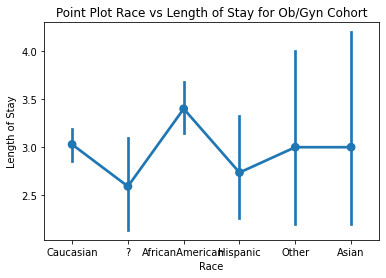

In [139]:
sns.pointplot(x="race", y="length of stay",data=df3)
# Adding Title to the Plot
plt.title("Point Plot Race vs Length of Stay for Ob/Gyn Cohort")
  
# Setting the X and Y labels
plt.xlabel('Race')
plt.ylabel('Length of Stay')
  


**Reviewing By Diabetes Medicine Count Plot** 
My first chart below looks at the full cohort (df) in which we can clearly see that about 77% of the patients are on diabetes medicine.  Yikes!!  That is a lot.  I am thinking that these patients **REALLY **need to be Care Managed.  
The second chart (df3) looks at the Ob/Gyn patients only. We can see that 65% of those patients were on Diabetes Medication.  

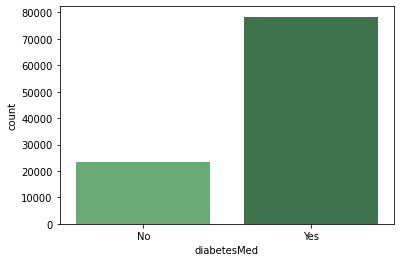

In [141]:
sns.countplot(x="diabetesMed",data=df, palette="Greens_d")

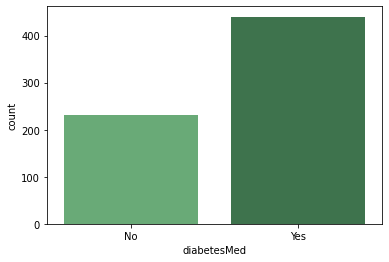

In [142]:
sns.countplot(x="diabetesMed",data=df3, palette="Greens_d")

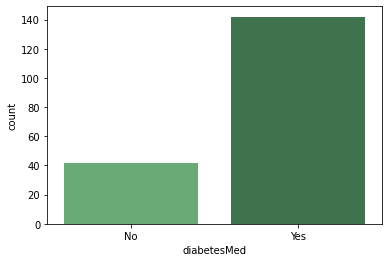

In [143]:
sns.countplot(x="diabetesMed",data=df4, palette="Greens_d")

**Reviewing By If patient is taking diabetes medication**
**Point Plot**
My first chart below looks at the full cohort (df) in which we can clearly see that those taking diabetes medication have the longest length of stay.  
The second chart (df3) looks at the Ob/Gyn patients only.  You can clearly see that again those patients taking diabetes medication have a longer average length of stay.  

Text(0, 0.5, 'Length of Stay')

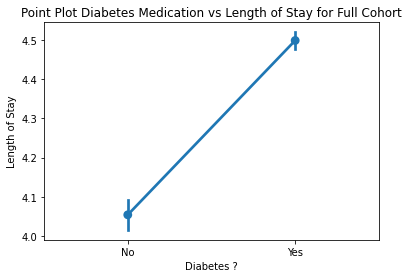

In [145]:
sns.pointplot(x="diabetesMed", y="length of stay",data=df)
# Adding Title to the Plot
plt.title("Point Plot Diabetes Medication vs Length of Stay for Full Cohort")
  
# Setting the X and Y labels
plt.xlabel('Diabetes ?')
plt.ylabel('Length of Stay')

Text(0, 0.5, 'Length of Stay')

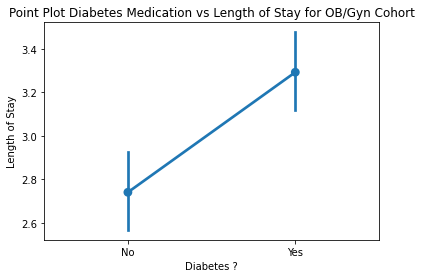

In [146]:
sns.pointplot(x="diabetesMed", y="length of stay",data=df3)
# Adding Title to the Plot
plt.title("Point Plot Diabetes Medication vs Length of Stay for OB/Gyn Cohort")
  
# Setting the X and Y labels
plt.xlabel('Diabetes ?')
plt.ylabel('Length of Stay')